The "Experiment.csv" file contains simulation data output with the following columns:timestep, atom id, atom type, vx (velocity along the x-axis), vy (velocity along the y-axis), and vz (velocity along the z-axis), x, y, z. The data is organized in ascending order based on the time-step as the primary sorting condition, and within each time-step, it is further sorted by atom id as the secondary sorting condition.

In [1]:
import os
script_dir = os.path.dirname('__file__') #<-- absolute dir the script is in
rel_path = "output/simulation_hydro1/hydro_test001/vtk/experiment.csv"
abs_file_path = os.path.join(script_dir, rel_path)

In [2]:
import numpy as np

In [3]:
array=np.loadtxt(open(abs_file_path, "rb"), delimiter=",", skiprows=1)

In [4]:
array.shape

(258964, 9)

We extra the velocities data from the file. Arrange the data in the following way:
$$V=\left[\begin{array}{c}VX\\
VY\\
VZ\end{array}\right]=\left[\begin{array}{cccc} v_x\left(x_{1}, t_{0}\right) & v_x\left(x_{1}, t_{1}\right) & \cdots & v_x\left(x_{1}, t_{100}\right) \\ v_x\left(x_{2}, t_{0}\right) & v_x\left(x_{2}, t_{1}\right) & \cdots & v_x\left(x_{2}, t_{100}\right) \\ \vdots & \vdots & \ddots & \vdots \\ v_x\left(x_{2563}, t_{0}\right) & u\left(x_{2563}, t_{1}\right) & \cdots & v_x\left(x_{2563}, t_{100}\right) \\ v_y\left(x_{1}, t_{0}\right) & v_y\left(x_{1}, t_{1}\right) & \cdots & v_y\left(x_{1}, t_{100}\right) \\ v_y\left(x_{2}, t_{0}\right) & v_y\left(x_{2}, t_{1}\right) & \cdots & v_y\left(x_{2}, t_{100}\right) \\ \vdots & \vdots & \ddots & \vdots \\ v_y\left(x_{2563}, t_{0}\right) & v_y\left(x_{2563}, t_{1}\right) & \cdots & v_y\left(x_{2563}, t_{100}\right)\\ v_z\left(x_{1}, t_{0}\right) & v_z\left(x_{1}, t_{1}\right) & \cdots & v_z\left(x_{1}, t_{100}\right) \\ v_z\left(x_{2}, t_{0}\right) & v_z\left(x_{2}, t_{1}\right) & \cdots & v_z\left(x_{2}, t_{100}\right) \\ \vdots & \vdots & \ddots & \vdots \\ v_z\left(x_{2563}, t_{0}\right) & v_z\left(x_{2563}, t_{1}\right) & \cdots & v_z\left(x_{2563}, t_{100}\right)\end{array}\right]$$


In [5]:
VX=np.reshape(array[0*2564:(0+1)*2564-1,3],(2563,1))
for i in range(1,101):
    VX=np.append(VX,np.reshape(array[i*2564:(i+1)*2564-1,3],(2563,1)),axis=1)

In [6]:
VY=np.reshape(array[0*2564:(0+1)*2564-1,4],(2563,1))
for i in range(1,101):
    VY=np.append(VY,np.reshape(array[i*2564:(i+1)*2564-1,4],(2563,1)),axis=1)

In [7]:
VZ=np.reshape(array[0*2564:(0+1)*2564-1,5],(2563,1))
for i in range(1,101):
    VZ=np.append(VZ,np.reshape(array[i*2564:(i+1)*2564-1,5],(2563,1)),axis=1)

In [8]:
VZ.shape

(2563, 101)

In [9]:
V=np.concatenate((VX,VY),axis=0)

In [10]:
V=np.concatenate((V,VZ),axis=0)

In [13]:
V.shape

(7689, 101)

Utilizing Singular Value Decomposition (SVD) on matrix V and visualizing the singular values through plotting to observe their trends.

In [16]:
U, S, Vh = np.linalg.svd(V,full_matrices=False)
print(np.shape(U))
print(np.shape(S))
print(np.shape(Vh))

(7689, 101)
(101,)
(101, 101)


Text(0, 0.5, 'singlar value')

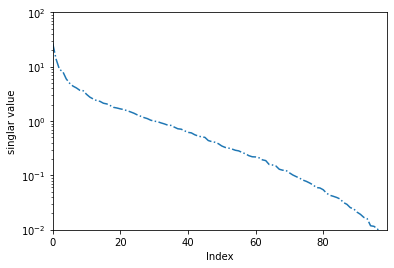

In [22]:
from matplotlib import pyplot as plt
plt.semilogy(S,'-.')
plt.xlim(0,99)
plt.ylim(10**(-2),10**2)
plt.xlabel('Index',fontsize=10)
plt.ylabel('singlar value',fontsize=10)

The first 40 singular values account for a significant proportion of the total sum of all singular values.

In [31]:
sum(S[0:40])/sum(S)

0.9229389181761992